In [1]:
# libraary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
#import statsmodels.api as sm                        
from sklearn import model_selection                                  
from sklearn.model_selection import train_test_split      
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler      # Scaling
from sklearn.impute import SimpleImputer

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics                                          
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score

from sklearn.linear_model import LogisticRegression     # For logistic Regression
from sklearn.naive_bayes import GaussianNB              # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier      # For K-NN Classifier
from sklearn.svm import SVC                             # For support vector machine based classifier
from sklearn.tree import DecisionTreeClassifier         # For Decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Specify the default path
os.chdir('..')
dir = os.getcwd()

In [2]:
def plot_confusion_matrix(y_test, yhat, name):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(name + ' Confusion Matrix', size=8)
    ax.xaxis.set_ticklabels(['Healthy','Not Healthy'])
    ax.yaxis.set_ticklabels([ 'Healthy','Not Healthy'])


# Logistic Regression
def LoR(X_tr,Y_tr,X_te,Y_te):
  lr = LogisticRegression(random_state=42)
  lr.fit(X_tr,Y_tr)
  lr_y_tr_pred = lr.predict(X_tr)
  lr_y_pred = lr.predict(X_te)

  # Confusion Matrix for the Logistic Regression Model
  plot_confusion_matrix(Y_te,lr_y_pred, 'LogisticRegression')
  test_acc =  accuracy_score(Y_te,lr_y_pred)
  train_acc =  accuracy_score(Y_tr,lr_y_tr_pred)
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Logistic Regression Model
  print("Classification Report : Logistic Regression")
  classRep = classification_report(Y_te, lr_y_pred, digits=2)
  print(classRep)


# KNN
def KNN(X_tr,Y_tr,X_te,Y_te):
  # creating odd list of K for KNN
  kvalue = list(range(1,5,1))

  # creating empty list for accuracy odd different value of K
  acc = []

  # perform accuracy metrics for values from different k values
  for k in kvalue:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_tr, Y_tr)
      # predict 
      y_pred = knn.predict(X_te)
      # evaluate accuracy
      accuracy = accuracy_score(Y_te, y_pred)
      acc.append(accuracy)

  # determining best k
  bestk = kvalue[acc.index(max(acc))]
  print("The optimal number of neighbors is %d" % bestk)
  plt.plot(kvalue,acc)

  # instantiate learning model (here k = 1)
  knn = KNeighborsClassifier(n_neighbors = bestk, weights = 'uniform', metric='euclidean')

  # fitting the model
  knn.fit(X_tr, Y_tr)

  # predict the response
  knn_y_pred = knn.predict(X_te)
  knn_y_tr_pred = knn.predict(X_tr)

  test_acc =  accuracy_score(Y_te,knn_y_pred)
  train_acc =  accuracy_score(Y_tr,knn_y_tr_pred)
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Confusion Matrix for the K-nearest neighbors Model
  plot_confusion_matrix(Y_te,knn_y_pred, 'KNN')

  # Classification Report for the K-nearest neighbors Model
  print("Classification Report : K-nearest neighbors")
  classRep = classification_report(Y_te, knn_y_pred, digits=2)
  print(classRep)


# Naive Bayes
def NB(X_tr,Y_tr,X_te,Y_te):
  # naive bayes
  nb = GaussianNB()
  nb.fit(X_tr , Y_tr)

  # predict the response
  nb_y_pred = nb.predict(X_te)
  nb_y_tr_pred = nb.predict(X_tr)

  # Confusion Matrix for the Naive Bayes
  plot_confusion_matrix(Y_te,nb_y_pred, 'Naive Bayes')

  test_acc =  accuracy_score(Y_te,nb_y_pred )
  train_acc =  accuracy_score(Y_tr,nb_y_tr_pred )
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Naive Bayes Model
  print("Classification Report : Naive Bayes")
  classRep = classification_report(Y_te, nb_y_pred, digits=2)
  print(classRep)


# Decision Tree
def DT(X_tr,Y_tr,X_te,Y_te):
  # Decison Tree
  dt = DecisionTreeClassifier(random_state=42)
  dt.fit(X_tr , Y_tr)

  # predict the response
  dt_y_pred = dt.predict(X_te)
  dt_y_tr_pred = dt.predict(X_tr)

  # Confusion Matrix for the Decision Tree
  plot_confusion_matrix(Y_te,dt_y_pred, 'Decision Tree')

  test_acc =  accuracy_score(Y_te, dt_y_pred )
  train_acc =  accuracy_score(Y_tr,dt_y_tr_pred )
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Decision Tree Model
  print("Classification Report : Decision Tree")
  classRep = classification_report(Y_te, dt_y_pred, digits=2)
  print(classRep)


# SVM
def svm(X_tr,Y_tr,X_te,Y_te):
  # Normally, C = 1 and gamma = 'scale' are default values
  # C controls how wide the margin will be with respect to how many misclassification we are allowing
  # C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
  param_grid = [
      {'C': [0.1,1,10],
      'kernel': ['rbf', 'linear','sigmoid']},
  ]

  optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=10, #  taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_tr, Y_tr)
  print(optimal_params.best_params_)

  #svm
  C = optimal_params.best_params_['C']
  kernel = optimal_params.best_params_['kernel']

  svm = SVC(C=C, kernel=kernel)
  svm.fit(X_tr,Y_tr)

  # predict the response
  svm_y_pred = svm.predict(X_te)
  svm_y_tr_pred = svm.predict(X_tr)

  # Confusion Matrix for the Support Vector Machine Model
  plot_confusion_matrix(Y_te,svm_y_pred, 'SVM')

  test_acc =  accuracy_score(Y_te, svm_y_pred )
  train_acc =  accuracy_score(Y_tr,svm_y_tr_pred )
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Support Vector Machine Model
  print("Classification Report : Support Vector Machine")
  classRep = classification_report(Y_te, svm_y_pred, digits=2)
  print(classRep)


def RF(X_tr,Y_tr,X_te,Y_te):
  
  # Create the param grid
  param_grid = {'n_estimators': [10,50,100],# Number of trees in random forest
                'max_depth': [1,5,10,20],# Maximum number of levels in tree
                'criterion':['gini','entropy'] }# measure the quality of a split

  optimal_params = GridSearchCV(RandomForestClassifier(),
                              param_grid,
                              cv=10, # we are taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_tr, Y_tr)
  print(optimal_params.best_params_)

  criterion = optimal_params.best_params_['criterion']
  max_depth = optimal_params.best_params_['max_depth']
  n_estimators = optimal_params.best_params_['n_estimators']

  #creating model of Random Forest
  RandomForest = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, criterion=criterion,random_state=42)
  RandomForest = RandomForest.fit(X_tr, Y_tr)

  # predict the response
  RandomForest_pred = RandomForest.predict(X_te)
  RandomForest_y_tr_pred = RandomForest.predict(X_tr)

  # Confusion Matrix for the Random Forest Model
  plot_confusion_matrix(Y_te,RandomForest_pred, 'Random Forest')

  test_acc =  accuracy_score(Y_te, RandomForest_pred )
  train_acc =  accuracy_score(Y_tr,RandomForest_y_tr_pred)
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Randome Forest Model
  print("Classification Report : Random Forest")
  print(classification_report(Y_te, RandomForest_pred, digits=2))

def Adaboost(X_tr,Y_tr,X_te,Y_te):
  param_grid = {'n_estimators': [1,5,10,50,100]}
  optimal_params = GridSearchCV(AdaBoostClassifier(),
                              param_grid,
                              cv=10, # we are taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_tr, Y_tr)
  print(optimal_params.best_params_)
  n_estimators = optimal_params.best_params_['n_estimators']
  
  #creating model of Adaptive Boosting
  AdBs = AdaBoostClassifier(n_estimators= n_estimators, random_state=42)
  AdBs  = AdBs.fit(X_tr, Y_tr)

  # predict the response
  AdBs_y_pred = AdBs.predict(X_te)
  AdBs_y_tr_pred = AdBs.predict(X_tr)

  # Confusion Matrix for the Adaptive Boosting Model
  plot_confusion_matrix(Y_te,AdBs_y_pred, 'AdaBoost')

  test_acc =  accuracy_score(Y_te, AdBs_y_pred )
  train_acc =  accuracy_score(Y_tr, AdBs_y_tr_pred)
  print('Testing Accuracy:',test_acc)
  print('Training Accuracy:',train_acc)

  # Classification Report for the Adaptive Boosting Model
  print("Classification Report : Adaptive Boosting")
  print(classification_report(Y_te, AdBs_y_pred, digits=2))

In [3]:
BBB = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Bundle branch block.csv')
HF = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Cardiomyopathy_Heart failure.csv')
DA = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Dysrhythmia.csv')
HC = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Health Control.csv')
MI = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Myocardial infarction.csv')
MC = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Myocarditis.csv')
VH = pd.read_csv(dir + '/FEATURE_EXTRACTION/BEAT/Features_Beat_Valvular heart disease.csv')

BBB = BBB.dropna().reset_index(drop=True).drop(['name'], axis=1)
HF = HF.dropna().reset_index(drop=True).drop(['name'], axis=1)
DA = DA.dropna().reset_index(drop=True).drop(['name'], axis=1)
HC = HC.dropna().reset_index(drop=True).drop(['name'], axis=1)
MI = MI.dropna().reset_index(drop=True).drop(['name'], axis=1)
MC = MC.dropna().reset_index(drop=True).drop(['name'], axis=1)
VH = VH.dropna().reset_index(drop=True).drop(['name'], axis=1)

### **BUNDLE BRANCH BLOCK AND HEALTHY CONTROL**

In [4]:
X_D = BBB.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

Testing Accuracy: 0.80078125
Training Accuracy: 0.833752093802345
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       547
         1.0       0.82      0.74      0.78       477

    accuracy                           0.80      1024
   macro avg       0.80      0.80      0.80      1024
weighted avg       0.80      0.80      0.80      1024



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


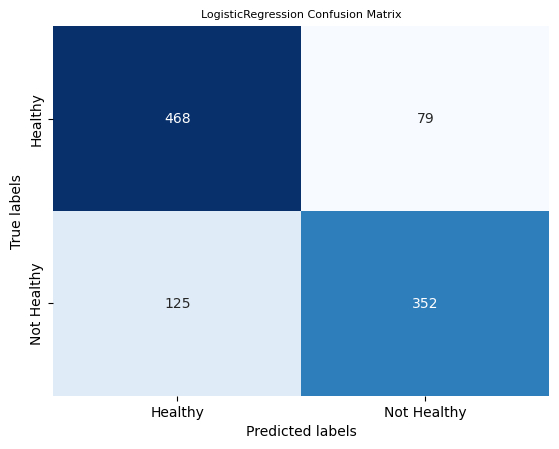

In [5]:
LoR(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The optimal number of neighbors is 1
Testing Accuracy: 0.919921875
Training Accuracy: 1.0
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       547
         1.0       0.94      0.89      0.91       477

    accuracy                           0.92      1024
   macro avg       0.92      0.92      0.92      1024
weighted avg       0.92      0.92      0.92      1024



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


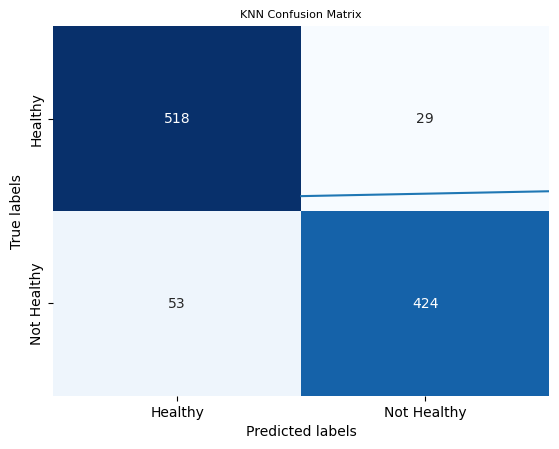

In [6]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.970703125
Training Accuracy: 1.0
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       547
         1.0       0.97      0.97      0.97       477

    accuracy                           0.97      1024
   macro avg       0.97      0.97      0.97      1024
weighted avg       0.97      0.97      0.97      1024



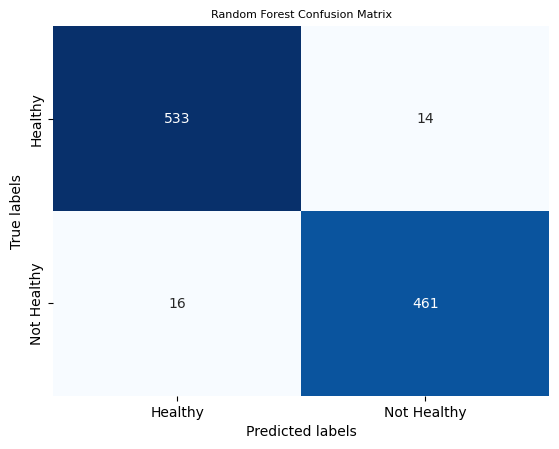

In [7]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 100}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8720703125
Training Accuracy: 0.9535175879396985
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       547
         1.0       0.87      0.85      0.86       477

    accuracy                           0.87      1024
   macro avg       0.87      0.87      0.87      1024
weighted avg       0.87      0.87      0.87      1024



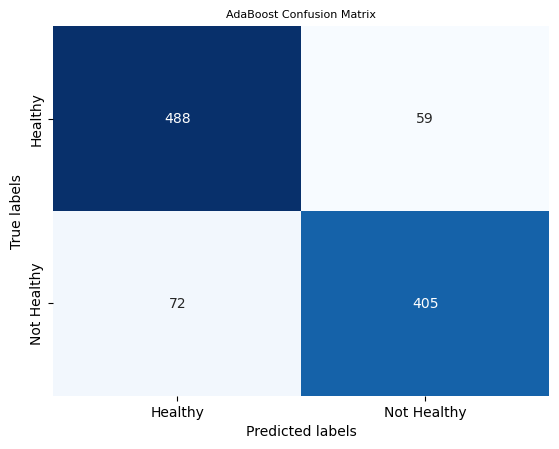

In [8]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.6845703125
Training Accuracy: 0.7106365159128978
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.75       547
         1.0       0.76      0.47      0.58       477

    accuracy                           0.68      1024
   macro avg       0.71      0.67      0.66      1024
weighted avg       0.70      0.68      0.67      1024



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


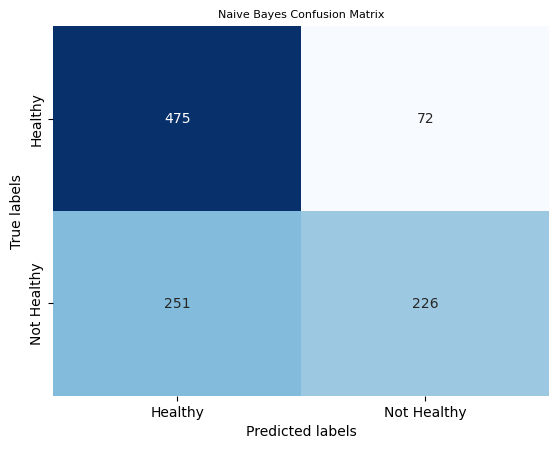

In [9]:
NB(X_train, y_train, X_test,y_test)

### **CARDIOMYOPATHY/HEART FAILURE AND HEALTHY CONTROL**

In [10]:
X_D = HF.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

Testing Accuracy: 0.8578199052132701
Training Accuracy: 0.8898373983739838
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       547
         1.0       0.86      0.84      0.85       508

    accuracy                           0.86      1055
   macro avg       0.86      0.86      0.86      1055
weighted avg       0.86      0.86      0.86      1055



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


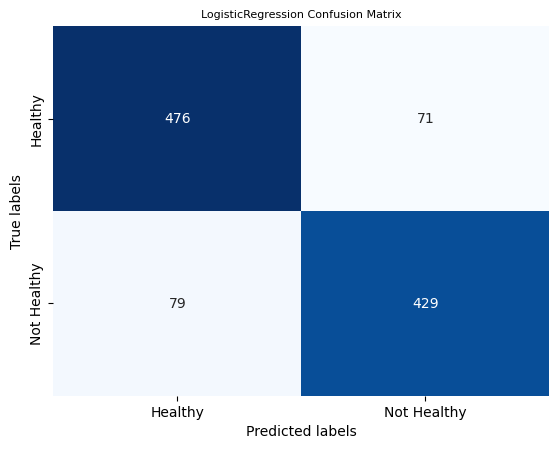

In [11]:
LoR(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classif

The optimal number of neighbors is 3
Testing Accuracy: 0.9071090047393365
Training Accuracy: 0.9491869918699187
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       547
         1.0       0.97      0.83      0.90       508

    accuracy                           0.91      1055
   macro avg       0.92      0.90      0.91      1055
weighted avg       0.92      0.91      0.91      1055



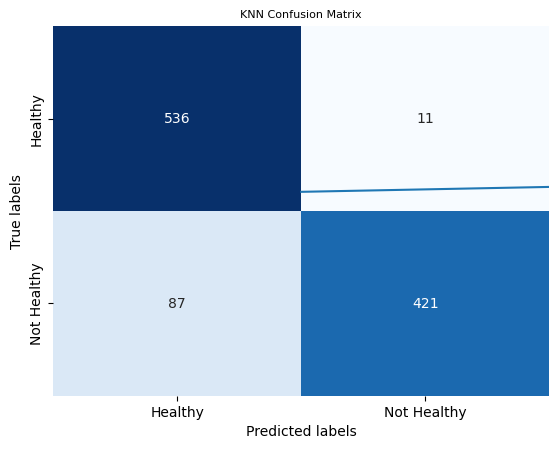

In [12]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.9677725118483412
Training Accuracy: 1.0
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       547
         1.0       0.97      0.96      0.97       508

    accuracy                           0.97      1055
   macro avg       0.97      0.97      0.97      1055
weighted avg       0.97      0.97      0.97      1055



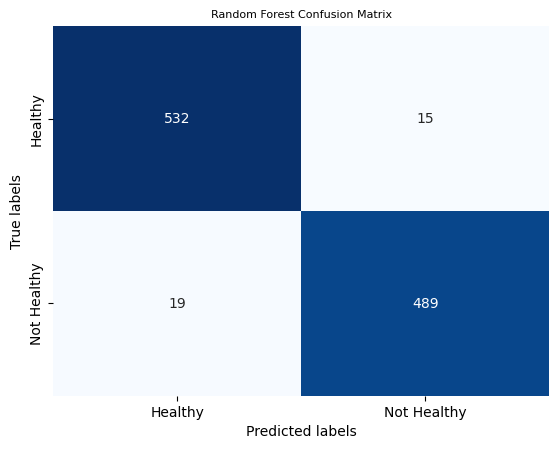

In [13]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 100}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9061611374407583
Training Accuracy: 0.9605691056910569
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       547
         1.0       0.89      0.92      0.90       508

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



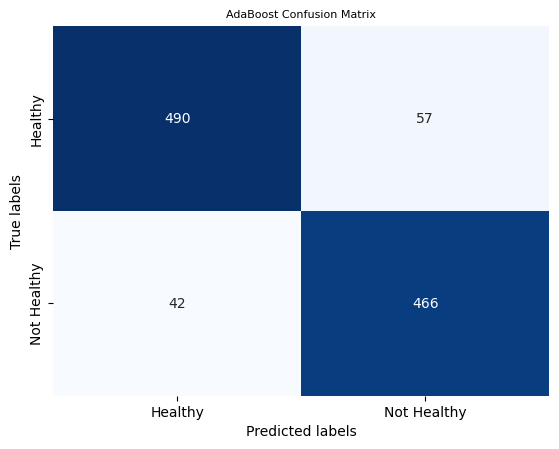

In [14]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.6436018957345971
Training Accuracy: 0.6686991869918699
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.73      0.50      0.59       547
         1.0       0.60      0.80      0.68       508

    accuracy                           0.64      1055
   macro avg       0.66      0.65      0.64      1055
weighted avg       0.66      0.64      0.64      1055



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


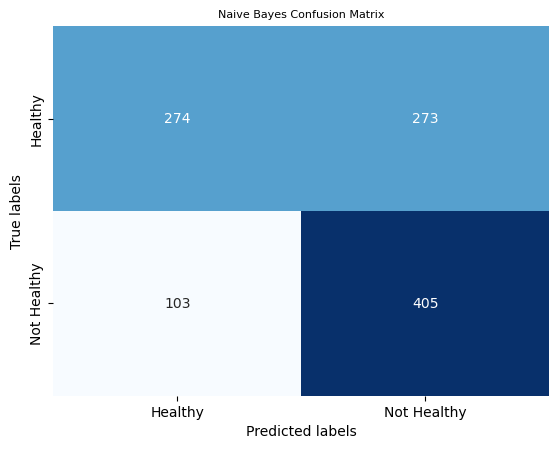

In [15]:
NB(X_train, y_train, X_test,y_test)

### **DYSRHYTHMIA AND HEALTHY CONTROL**

In [16]:
X_D = DA.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8830874006810443
Training Accuracy: 0.887481734047735
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       547
         1.0       0.86      0.82      0.84       334

    accuracy                           0.88       881
   macro avg       0.88      0.87      0.87       881
weighted avg       0.88      0.88      0.88       881



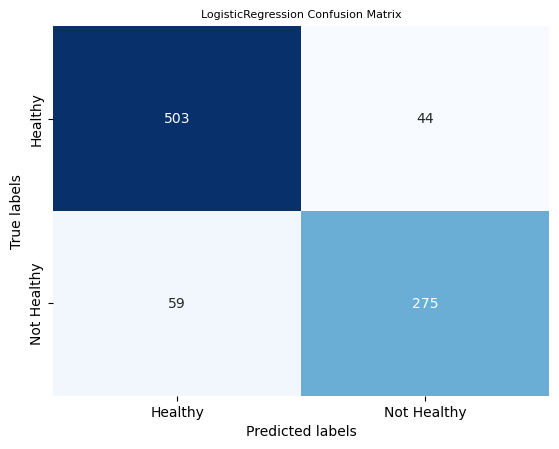

In [17]:
LoR(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classif

The optimal number of neighbors is 1
Testing Accuracy: 0.8717366628830874
Training Accuracy: 1.0
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       547
         1.0       0.90      0.74      0.81       334

    accuracy                           0.87       881
   macro avg       0.88      0.85      0.86       881
weighted avg       0.87      0.87      0.87       881



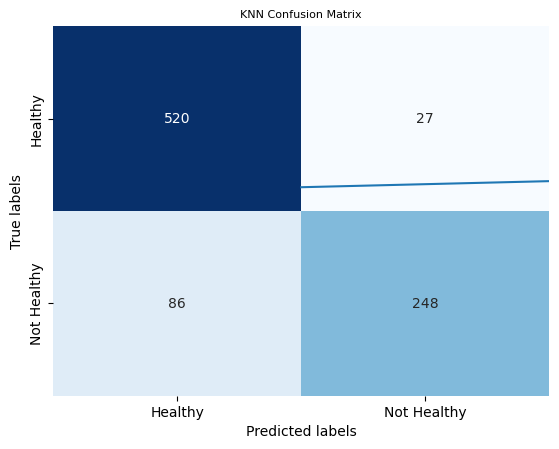

In [18]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.9432463110102156
Training Accuracy: 1.0
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       547
         1.0       0.93      0.92      0.92       334

    accuracy                           0.94       881
   macro avg       0.94      0.94      0.94       881
weighted avg       0.94      0.94      0.94       881



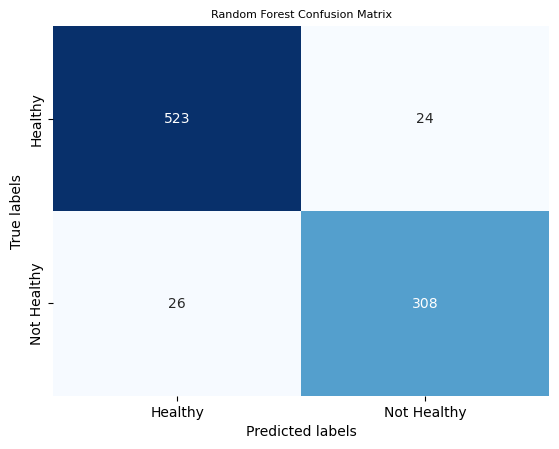

In [19]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 100}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8978433598183881
Training Accuracy: 0.9517778860204579
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       547
         1.0       0.87      0.85      0.86       334

    accuracy                           0.90       881
   macro avg       0.89      0.89      0.89       881
weighted avg       0.90      0.90      0.90       881



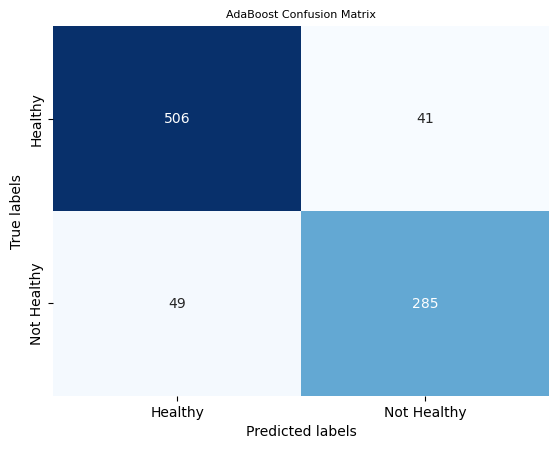

In [20]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.6799091940976163
Training Accuracy: 0.7316122747199221
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       547
         1.0       0.62      0.39      0.48       334

    accuracy                           0.68       881
   macro avg       0.66      0.62      0.63       881
weighted avg       0.67      0.68      0.66       881



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


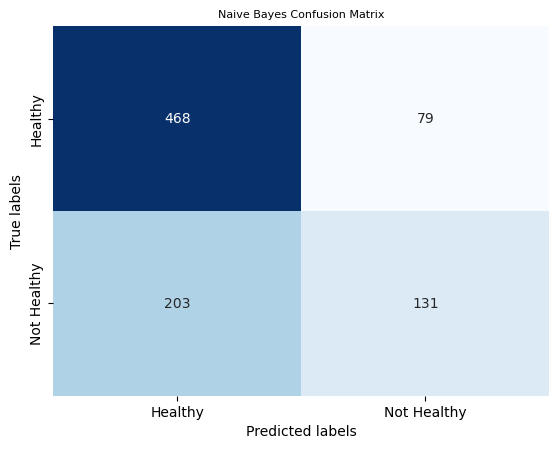

In [21]:
NB(X_train, y_train, X_test,y_test)

### **MYOCARDIAL INFARCTION AND HEALTHY CONTROL**

In [22]:
X_D = MI.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9201183431952663
Training Accuracy: 0.9315010570824525
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       547
         1.0       0.93      0.90      0.91       467

    accuracy                           0.92      1014
   macro avg       0.92      0.92      0.92      1014
weighted avg       0.92      0.92      0.92      1014



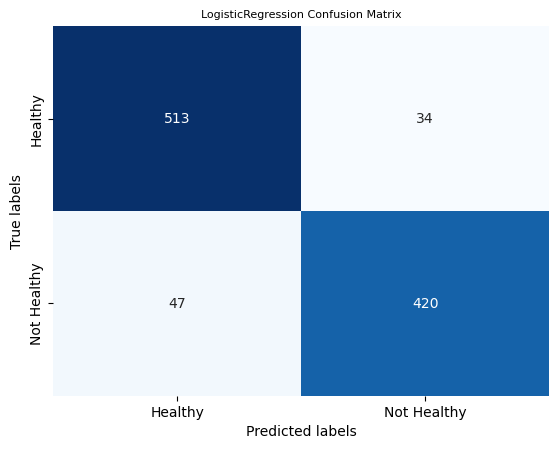

In [23]:
LoR(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The optimal number of neighbors is 3


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing Accuracy: 0.9467455621301775
Training Accuracy: 0.9674418604651163
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       547
         1.0       0.97      0.91      0.94       467

    accuracy                           0.95      1014
   macro avg       0.95      0.94      0.95      1014
weighted avg       0.95      0.95      0.95      1014



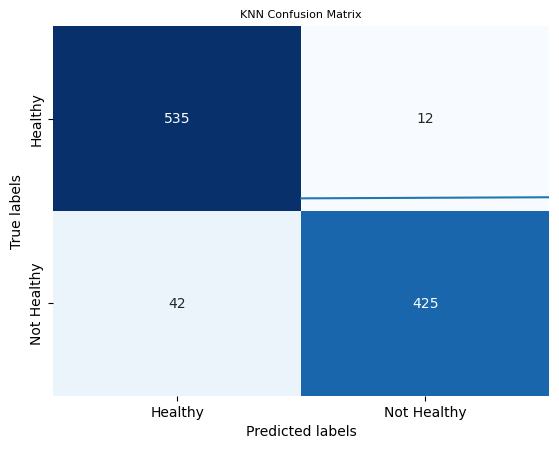

In [24]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.9733727810650887
Training Accuracy: 1.0
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       547
         1.0       0.98      0.96      0.97       467

    accuracy                           0.97      1014
   macro avg       0.97      0.97      0.97      1014
weighted avg       0.97      0.97      0.97      1014



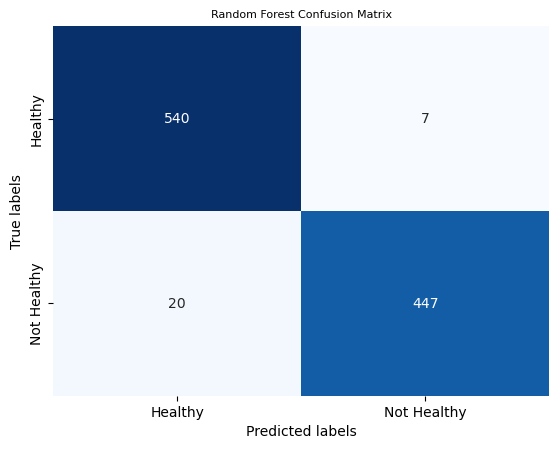

In [25]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 100}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9467455621301775
Training Accuracy: 0.9788583509513742
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       547
         1.0       0.95      0.93      0.94       467

    accuracy                           0.95      1014
   macro avg       0.95      0.95      0.95      1014
weighted avg       0.95      0.95      0.95      1014



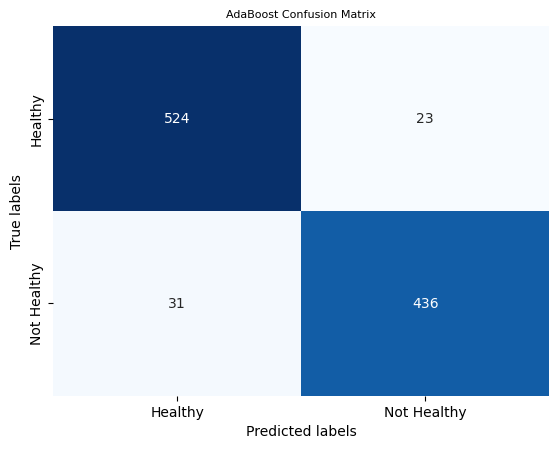

In [26]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.747534516765286
Training Accuracy: 0.6993657505285412
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74       547
         1.0       0.69      0.84      0.75       467

    accuracy                           0.75      1014
   macro avg       0.76      0.75      0.75      1014
weighted avg       0.76      0.75      0.75      1014



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


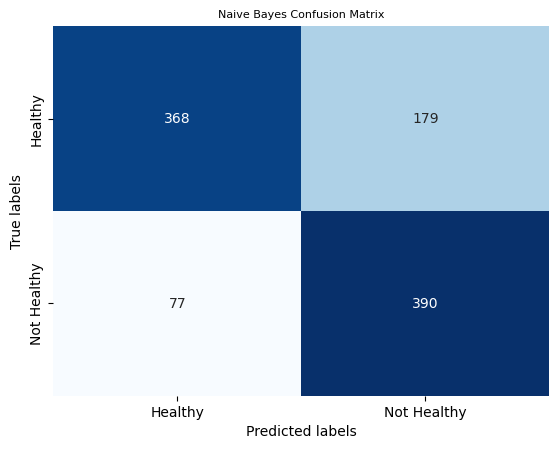

In [27]:
NB(X_train, y_train, X_test,y_test)

### **MYOCARDITIS AND HEALTHY CONTROL**

In [28]:
X_D = MC.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8989751098096632
Training Accuracy: 0.9321181646763043
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       548
         1.0       0.77      0.70      0.73       135

    accuracy                           0.90       683
   macro avg       0.85      0.82      0.83       683
weighted avg       0.90      0.90      0.90       683



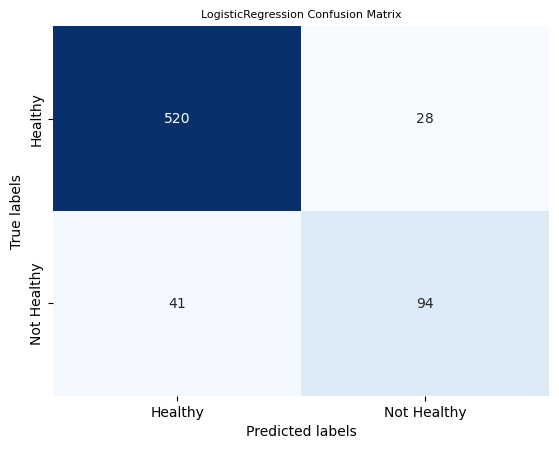

In [29]:
LoR(X_train, y_train, X_test,y_test)

The optimal number of neighbors is 1


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classif

Testing Accuracy: 0.9619326500732065
Training Accuracy: 1.0
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       548
         1.0       0.89      0.92      0.91       135

    accuracy                           0.96       683
   macro avg       0.94      0.95      0.94       683
weighted avg       0.96      0.96      0.96       683



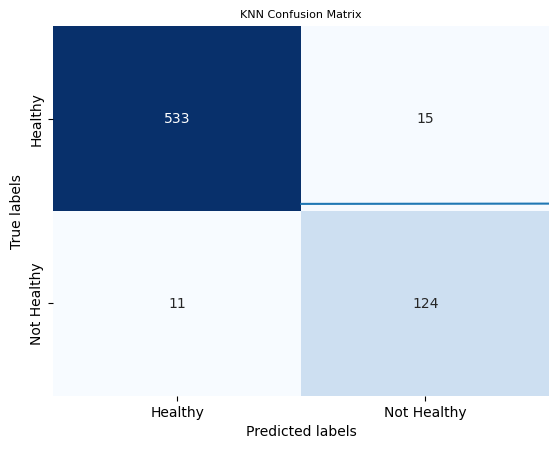

In [30]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.9707174231332357
Training Accuracy: 1.0
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       548
         1.0       1.00      0.85      0.92       135

    accuracy                           0.97       683
   macro avg       0.98      0.93      0.95       683
weighted avg       0.97      0.97      0.97       683



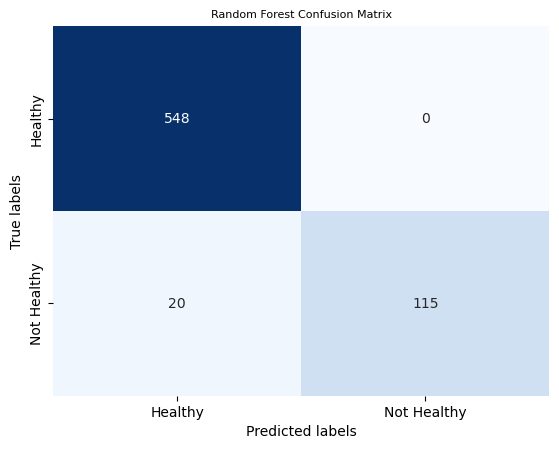

In [31]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 50}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9399707174231332
Training Accuracy: 0.9660590823381521
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       548
         1.0       0.94      0.74      0.83       135

    accuracy                           0.94       683
   macro avg       0.94      0.86      0.90       683
weighted avg       0.94      0.94      0.94       683



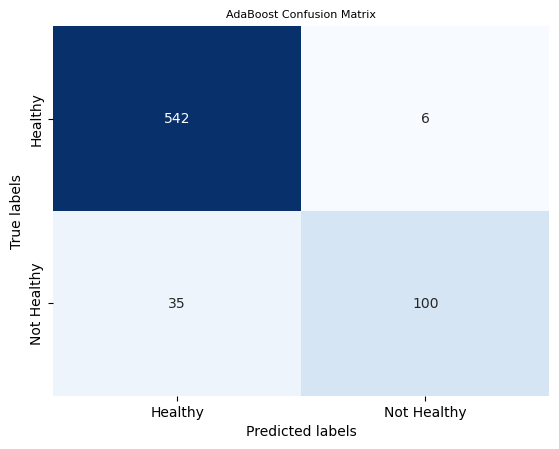

In [32]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.767203513909224
Training Accuracy: 0.7083595223130107
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84       548
         1.0       0.44      0.68      0.54       135

    accuracy                           0.77       683
   macro avg       0.68      0.73      0.69       683
weighted avg       0.82      0.77      0.78       683



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


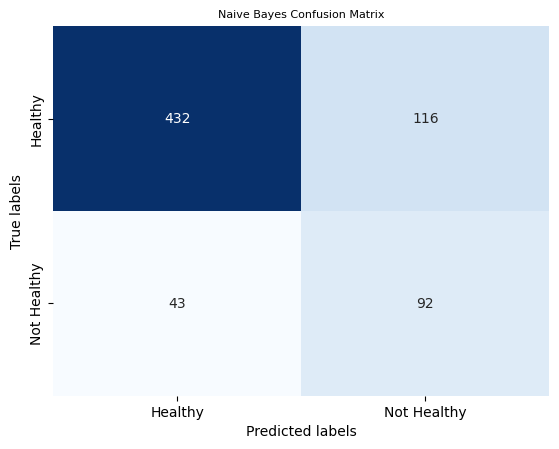

In [33]:
NB(X_train, y_train, X_test,y_test)

### **VALVULAR HEART DISEASE AND HEALTHY CONTROL**

In [34]:
X_D = VH.to_numpy()
X_H = HC.to_numpy()

Y_D = np.ones((X_D.shape[0],1))
Y_H = np.zeros((X_H.shape[0],1))

X = np.vstack((X_D, X_H))
Y = np.vstack((Y_D, Y_H))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=42, stratify=Y)

scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train = pd.DataFrame(scaler.fit_transform(X_train))

Testing Accuracy: 0.9838472834067548
Training Accuracy: 0.9899307740717432
Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       547
         1.0       0.96      0.96      0.96       134

    accuracy                           0.98       681
   macro avg       0.98      0.97      0.97       681
weighted avg       0.98      0.98      0.98       681



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


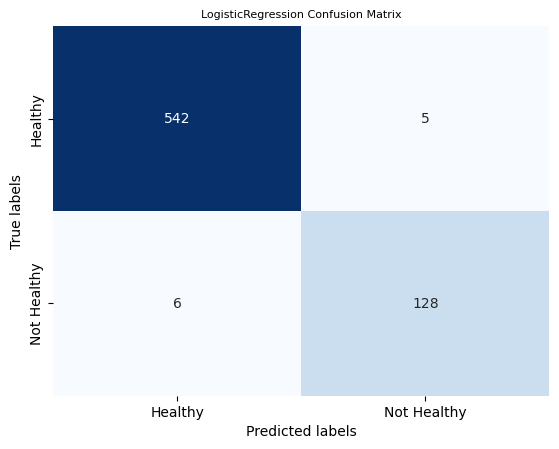

In [35]:
LoR(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The optimal number of neighbors is 3
Testing Accuracy: 0.9647577092511013
Training Accuracy: 0.9855254877281309
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       547
         1.0       0.99      0.83      0.90       134

    accuracy                           0.96       681
   macro avg       0.98      0.91      0.94       681
weighted avg       0.97      0.96      0.96       681



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


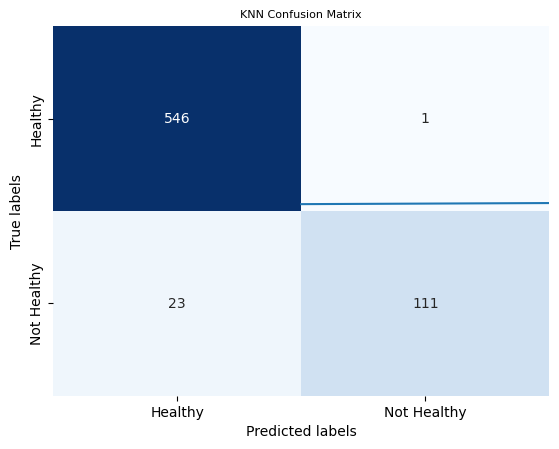

In [36]:
KNN(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/senume/anaconda3/envs/

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


/tmp/ipykernel_31428/3426239696.py:195: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest = RandomForest.fit(X_tr, Y_tr)


Testing Accuracy: 0.9691629955947136
Training Accuracy: 0.9987413467589679
Classification Report : Random Forest
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       547
         1.0       1.00      0.84      0.91       134

    accuracy                           0.97       681
   macro avg       0.98      0.92      0.95       681
weighted avg       0.97      0.97      0.97       681



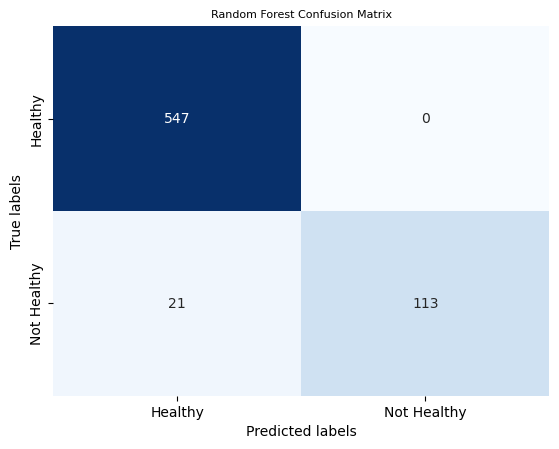

In [37]:
RF(X_train, y_train, X_test,y_test)

/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validatio

{'n_estimators': 100}


/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9897209985315712
Training Accuracy: 1.0
Classification Report : Adaptive Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       547
         1.0       0.98      0.97      0.97       134

    accuracy                           0.99       681
   macro avg       0.99      0.98      0.98       681
weighted avg       0.99      0.99      0.99       681



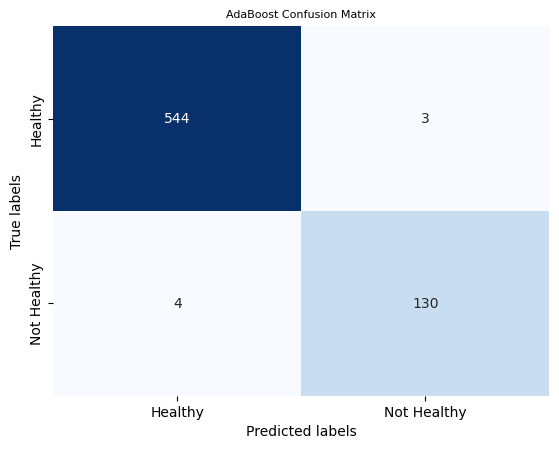

In [38]:
Adaboost(X_train, y_train, X_test,y_test)

Testing Accuracy: 0.644640234948605
Training Accuracy: 0.5418502202643172
Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.93      0.60      0.73       547
         1.0       0.33      0.81      0.47       134

    accuracy                           0.64       681
   macro avg       0.63      0.71      0.60       681
weighted avg       0.81      0.64      0.68       681



/home/senume/anaconda3/envs/mis-ECG_analysis_DMD/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


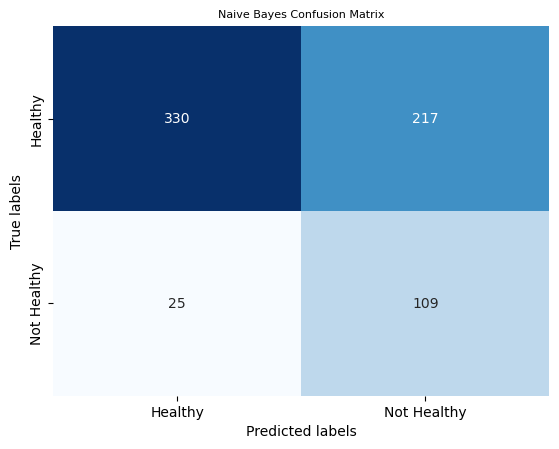

In [39]:
NB(X_train, y_train, X_test,y_test)